# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
from types import SimpleNamespace
from scipy import optimize
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tabulate import tabulate
plt.style.use('seaborn-whitegrid')
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject_bis import HouseholdSpecializationModelClass

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11968\4042047085.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Question 1

**Explain how you solve the model**

In [2]:
#calling the House Specialization model (RODRI Y ALE)
model = HouseholdSpecializationModelClass()

#creating the vectors with the different values of alphas and sigmas
alphas=np.array([0.25,0.5,0.75])
sigmas=np.array([0.5,1.0,1.5])

#create empty disctionary and lists to save the following results
dic_sol_q1 = {}
l_alpha = []
l_sigma = []
l_HM = [] 
l_HF = []
l_ratio = []

#Doing a loop to calculate the model with all the possible combinations of alphas and sigmas
for a,i in enumerate(alphas):
    for b,j in enumerate(sigmas):
        model.par.alpha=i
        model.par.sigma=j
        solution = model.solve_discrete()
        dic_sol_q1[a,b] = {'alpha': i, 'sigma':j, 'HF': solution.HF, 'HM': solution.HM, 'r_HF_HM': solution.HF/solution.HM}
        l_alpha.append(model.par.alpha)
        l_sigma.append(model.par.sigma)
        l_HF.append(solution.HF)
        l_HM.append(solution.HM)
        l_ratio.append(solution.HF/solution.HM)
        # print(dic_par)
        # print(f'for each alpha = {l_alpha} and sigma = {l_sigma}, HF = {l_HF} and HM = {l_HM} with a ratio HF/HM = {l_ratio}')

results = pd.DataFrame({'alpha':l_alpha, 'sigma':l_sigma, 'HF':l_HF, 'HM':l_HM, 'HF/HM': l_ratio})
pd.set_option('display.float_format',  '{:,.2f}'.format)
print(results.to_string(index=False))

c:\Users\Usuario\Documents\KU\Semester II\Programming\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H = (1-par.alpha)*HM**(1-1/par.sigma) + (par.alpha)*HF**(1-1/par.sigma)
c:\Users\Usuario\Documents\KU\Semester II\Programming\projects-2023-latin-power\inauguralproject\inauguralproject_bis.py:67: RuntimeWarning: invalid value encountered in multiply
  Q = C**par.omega*H**(1-par.omega)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11968\2276454989.py:22: RuntimeWarning: invalid value encountered in double_scalars
  dic_sol_q1[a,b] = {'alpha': i, 'sigma':j, 'HF': solution.HF, 'HM': solution.HM, 'r_HF_HM': solution.HF/solution.HM}
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11968\2276454989.py:27: RuntimeWarning: invalid value encountered in double_scalars
  l_ratio.append(solution.HF/solution.HM)


 alpha  sigma   HF   HM  HF/HM
  0.25   0.50 0.00 0.00    NaN
  0.25   1.00 2.00 6.50   0.31
  0.25   1.50 0.50 4.00   0.12
  0.50   0.50 0.00 0.00    NaN
  0.50   1.00 4.50 4.50   1.00
  0.50   1.50 2.50 2.00   1.25
  0.75   0.50 0.00 0.00    NaN
  0.75   1.00 6.50 2.00   3.25
  0.75   1.50 4.00 0.50   8.00


# Question 2

Explain your code and procedure

Text(0.5, 0, 'Log of ratio of wages Female/Male')

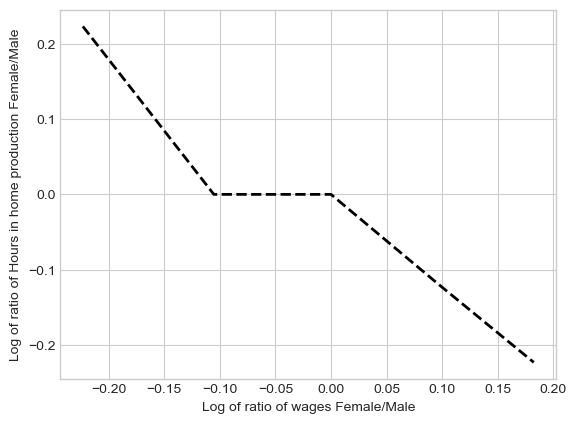

In [3]:
#calling the House Specialization model (RODRI Y ALE)
model = HouseholdSpecializationModelClass()

#creating the vectors with the different values of female wages
wF_new=np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty dictionary and lists to save the following results
dic_sol_q2 = {}
l_wF = []
l_wM = []
l_r_wF_wM = []
l_lr_wF_wM = []
l_HF = [] 
l_HM = []
l_r_HF_HM = []
l_logr_HF_HM = []

#doing a loop to calculate the model with the new values of the female wages and print it
for a, wF in enumerate(wF_new):
        model.par.wF = wF
        solution=model.solve_discrete()
        dic_sol_q2[a] = {'wF': wF, 'wM': model.par.wM, 'r_wF_wM': wF/model.par.wM, 'HF': solution.HF, 'HM': solution.HM, 'r_HF_HM': solution.HF/solution.HM, 'logr_HF_HM': math.log(solution.HF/solution.HM)}

        l_wF.append(wF)
        l_wM.append(model.par.wM)

        l_r_wF_wM.append(wF/model.par.wM)
        l_lr_wF_wM.append(math.log(wF/model.par.wM))

        l_HF.append(solution.HF)
        l_HM.append(solution.HM)

        l_r_HF_HM.append(solution.HF/solution.HM)
        l_logr_HF_HM.append(math.log(solution.HF/solution.HM))

results = pd.DataFrame({'wF':l_wF, 'wM':l_wM, 'wF/wM':l_r_wF_wM, 'LOG_wF/wM':l_lr_wF_wM, 'HF':l_HF, 'HM':l_HM, 'HF/HM': l_r_HF_HM, 'LOG_HF/HM': l_logr_HF_HM})

#creating the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results["LOG_wF/wM"],results["LOG_HF/HM"],ls='--',lw=2,color='black')
ax.set_ylabel('Log of ratio of Hours in home production Female/Male')
ax.set_xlabel('Log of ratio of wages Female/Male')


# Question 3

Explain your code and procedure

LM = 6, HM = 4, LF = 3, HF = 5
Utility = 0.2451
LM = 5, HM = 4, LF = 4, HF = 5
Utility = 0.2419
LM = 4, HM = 4, LF = 4, HF = 4
Utility = 0.2381
LM = 4, HM = 5, LF = 5, HF = 4
Utility = 0.2340
LM = 3, HM = 5, LF = 5, HF = 4
Utility = 0.2297
    wF   wM  wF/wM  LOG_wF/wM   HF   HM  HF/HM  LOG_HF/HM
0 0.80 1.00   0.80      -0.22 5.12 4.09   1.25       0.22
1 0.90 1.00   0.90      -0.11 4.75 4.27   1.11       0.11
2 1.00 1.00   1.00       0.00 4.45 4.45   1.00       0.00
3 1.10 1.00   1.10       0.10 4.22 4.64   0.91      -0.10
4 1.20 1.00   1.20       0.18 4.03 4.83   0.83      -0.18


Text(0.5, 0, 'Log of ratio of wages Female/Male')

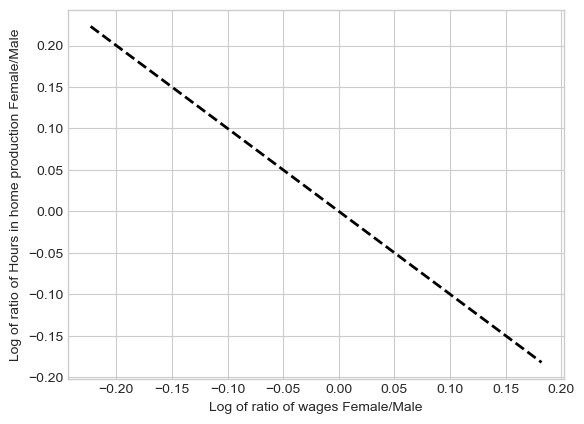

In [4]:
#calling the model
model = HouseholdSpecializationModelClass()

#creating the vectors with the different values of female wages
wF_new_2=np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty dictionary and lists to save the following results
dic_sol_q3 = {}
l_wF_3 = []
l_wM_3 = []
l_r_wF_wM_3 = []
l_logr_wF_wM_3 = []
l_HF_3 = [] 
l_HM_3 = []
l_r_HF_HM_3 = []
l_logr_HF_HM_3 = []

#doing a loop to calculate the model with the new values of the female wages and print it
for a, i in enumerate(wF_new_2):
    model.par.wF = i
    sol_q3 = model.solve_continously(do_print=False)
    dic_sol_q3[a] = {'wF': i, 'wM': model.par.wM, 'r_wF_wM': i/model.par.wM, 'HF': sol_q3.HF, 'HM': sol_q3.HM, 'r_HF_HM': sol_q3.HF/sol_q3.HM, 'logr_HF_HM': math.log(sol_q3.HF/sol_q3.HM), 'logr_wF_wM': math.log(i/model.par.wM)}
    l_wF_3.append(i)
    l_wM_3.append(model.par.wM) 
    l_r_wF_wM_3.append(i/model.par.wM)
    l_logr_wF_wM_3.append(math.log(i/model.par.wM))
    l_HF_3.append(sol_q3.HF)
    l_HM_3.append(sol_q3.HM)
    l_r_HF_HM_3.append(sol_q3.HF/sol_q3.HM)
    l_logr_HF_HM_3.append(math.log(sol_q3.HF/sol_q3.HM))

# print(dic_sol_q3[a])
results_3 = pd.DataFrame({'wF':l_wF_3, 'wM':l_wM_3, 'wF/wM':l_r_wF_wM_3, 'LOG_wF/wM':l_logr_wF_wM_3, 'HF':l_HF_3, 'HM':l_HM_3, 'HF/HM': l_r_HF_HM_3, 'LOG_HF/HM': l_logr_HF_HM_3})
print (results_3)

#creating the graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_3["LOG_wF/wM"],results_3["LOG_HF/HM"],ls='--',lw=2,color='black')
ax.set_ylabel('Log of ratio of Hours in home production Female/Male')
ax.set_xlabel('Log of ratio of wages Female/Male')


# Question 4

In [8]:
#calling the model
model = HouseholdSpecializationModelClass()

model.solve_wF_vec()

LM = 5.8893
HM = 4.0926
LF = 2.8698
HF = 5.1157
u = 0.2451
LM = 6, HM = 4, LF = 3, HF = 5
Utility = 0.2451
iteration = 0 wage of woman 0.8 sigma =  1.0 alpha =  0.5


AttributeError: 'HouseholdSpecializationModelClass' object has no attribute 'LM'

# Question 5

In [ ]:
# code

ADD CONCISE CONLUSION.